In [28]:
import numpy as np
import bisect
from numba import jit

@jit
def imadjust(src, tol=1, vin=[0,255], vout=(0,255)):
    # src : input one-layer image (numpy array)
    # tol : tolerance, from 0 to 100.
    # vin  : src image bounds
    # vout : dst image bounds
    # return : output img

    assert len(src.shape) == 2 ,'Input image should be 2-dims'

    tol = max(0, min(100, tol))

    if tol > 0:
        # Compute in and out limits
        # Histogram
        hist = np.histogram(src,bins=list(range(256)),range=(0,255))[0]

        # Cumulative histogram
        cum = hist.copy()
        for i in range(1, 256): cum[i] = cum[i - 1] + hist[i]

        # Compute bounds
        total = src.shape[0] * src.shape[1]
        low_bound = total * tol / 100
        upp_bound = total * (100 - tol) / 100
        vin[0] = bisect.bisect_left(cum, low_bound)
        vin[1] = bisect.bisect_left(cum, upp_bound)

    # Stretching
    scale = (vout[1] - vout[0]) / (vin[1] - vin[0])
    vs = src-vin[0]
    vs[src<vin[0]]=0
    vd = vs*scale+0.5 + vout[0]
    vd[vd>vout[1]] = vout[1]
    dst = vd

    return dst

In [29]:
import cv2 as cv
from google.colab.patches import cv2_imshow as imshow


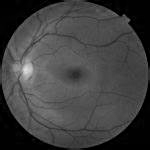

In [30]:
img = cv.imread('retina.jpeg')

img_green = img[:,:,1]

imshow(img_green)

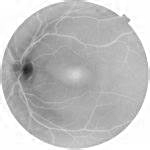

In [31]:
img_comp_green = cv.bitwise_not(img_green)
imshow(img_comp_green)

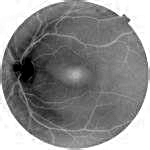

In [38]:
t1 = imadjust(img_comp_green, 1)
imshow(t1)

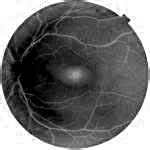

In [39]:
t2 = imadjust(img_comp_green, 5)
imshow(t2)

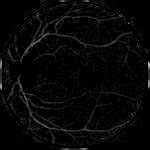

In [40]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
topHat = cv.morphologyEx(t2, cv.MORPH_TOPHAT, kernel)
imshow(topHat)